 # Nearest Neighbors

 ## Wine Quality Data set 
 
 #### Krittin Kanokwilairat   &emsp; 59104540026   &emsp; section 200



- ชุดข้อมูลจากเว็บ UCI machine learning repository


- Preprocess dataset ในกรณีที่คิดว่าจําเป็น
- เขียนโปรแกรมภาษา Python โดยเรียกใช้  k-Nearest Neighbors algorithm จาก scikit-learn


- อธิบายการทํา preprocess

- ผลการทดลองแสดงค่า accuracy


### ทำการนำ dataset เข้ามา process ทำการ pre processing




## แยก 12 attrtibutes ออกเป็น features และ target classes
## โดย features มีดังนี้
 - fixed acidity                                   หมายถึง ค่าของ fixed acidity
 - volatile acidity       หมายถึง ค่าของ volatile acidity
 - citric acid            หมายถึง ค่ากรด citric acid
 - residual sugar         หมายถึง ค่าน้ำตาลที่ตกค้าง
 - chlorides              หมายถึง ค่า chlorides
 - free sulfur dioxide    หมายถึง ค่า free sulfur dioxide
 - total sulfur dioxide   หมายถึงค่า sulfer dioxide รวม
 - density                หมายถึงค่า ความหนาแน่น
 - pH                     หมายถึงค่า pH ระหว่าง 1-7 ความเป็นกรดด่าง
 - sulphates              หมายถึงค่า sulphates
 - alcohol                หมายถึงค่า alcohol
 ### ทั้งหมด 11 featues
 
 ## target classes มีดังนี้
 - quality (score between 0 and 10)



















In [1]:
#  import library
import pandas as pd
from sklearn import metrics 
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import sklearn.datasets as datasets

#  import data set
headers = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density' , 'pH',  'sulphates',  'alcohol', 'quality']

df = pd.read_csv("winequality-red.csv",sep= ';', header=None, names=headers)




features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density' , 'pH',  'sulphates',  'alcohol','quality' ]
X = df[features]
y = df.quality 


C:\Users\Tee\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:

import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_validate

import matplotlib.pyplot as plt
%matplotlib inline



### การทำ preprocess dataset 

In [3]:
def  preprocessing(train):

    ls = []
    for i in train:
        if int(i) > 5 :
            i = '1'
        else:
            i = '0'
        
        ls.append(i)
        
        
   



    return ls

In [4]:
y= preprocessing(y)
print(y)

['0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0',

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) # 90% training and 10% test
modelNeighbors_k1 = neighbors.KNeighborsClassifier(n_neighbors=1, weights='uniform')
modelNeighbors_k3 = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
modelNeighbors_k5 = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
modelNeighbors_k5d = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')


## k-Nearest Neighbor  model
#### ขั้นตอนวิธีการเพื่อนบ้านที่ใกล้ที่สุด (K-Nearest Neighbour Algorithm) จะใช้ในการจัดแบ่ง class เทคนิคนี้จะตัดสินใจว่า คลาสใดที่จะแทนเงื่อนไขหรือกรณีใหม่ๆ ได้บ้าง โดยหลักการค้นหาตัวอย่างที่มีความคล้ายตัวอย่างที่ต้องการจำแนกโดยใช้การเปรียบเทียบระยะห่างระหว่าง train set กับ test set โดยตัวอย่างที่อยู่ใกล้ที่สุดจะเรียกว่า nearest neighbor


#### ค่า k มีความสำคัญต่อผลลัพธ์การจำแนก และส่งผลต่อประสิทธิภาพของความถูกต้องแม่นยำ accuracy ของการจำแนก
#### โดยจะกำหนดค่า k เป็นเลขคี่ เช่น 1 3 5 โดยอาจใช้วิธี เสียงส่วนใหญ่ majority vote  บางครั้งการกำหนดค่า k = 1 อาจไม่ดีเนื่องจากภายใน data set อาจมี noise อยู่ โดย KNN algorithm เหมาะกับปัญหาด้าน  classification และ regression

#### KNeighborsClassifier จะเป็นการกำหนดจำนวนของเพื่อนบ้าน
#### RadiusNeighborsClassifier จะเป็นการกำหนดระยะทางว่ามีเพื่อนบ้านอยู่กี่คน

#### การกำหนดการใช้ weighted vote
- uniform โดยทั่วไปมักใช้ ทุก weights มีความสำคัญเท่ากันหมด ยึดผลการ vote ส่วนใหญ่
- distance จะมีความสำคัญไม่เท่ากัน เพื่อนบ้านที่อยู่ใกล้ที่สุด คะแนน vote จะมากกว่าและสำคัญกว่าคนที่อยู่ไกล


####  กรณีนี้จะให้ค่า k = 1, 3, 5 และให้ค่า weights เป็นแบบ uniform และ distance

In [9]:
from sklearn.model_selection import cross_val_score


modelNeighborsCV_k1 = cross_val_score(modelNeighbors_k1,X,y,cv=10)
modelNeighborsCV_k3 = cross_val_score(modelNeighbors_k3,X,y,cv=10)
modelNeighborsCV_k5 = cross_val_score(modelNeighbors_k5,X,y,cv=10)
modelNeighborsCV_k5d = cross_val_score(modelNeighbors_k5d,X,y,cv=10)


print('k = 1: ')
print(modelNeighborsCV_k1)
print('k = 3: ')
print(modelNeighborsCV_k3)
print('k = 5: ')
print(modelNeighborsCV_k5)
print('k = 5 weghted by distance: ')
print(modelNeighborsCV_k5d)

k = 1: 
[0.7375     0.79375    0.75       0.71875    0.7375     0.75
 0.7375     0.70625    0.725      0.74842767]
k = 3: 
[0.725      0.79375    0.79375    0.7        0.80625    0.75625
 0.6125     0.7        0.7        0.72327044]
k = 5: 
[0.7       0.79375   0.79375   0.6875    0.7125    0.775     0.63125
 0.675     0.64375   0.6918239]
k = 5 weghted by distance: 
[0.725      0.8125     0.7875     0.7125     0.74375    0.76875
 0.63125    0.6875     0.675      0.72327044]


### ทำการทดลองแบบ cross validation
#### โดยจะใช้หลัก k-Fold Cross Validation กำหนดให้ ค่า k = 10 แบ่งข้อมูลเป็น 10 ส่วนเพื่อสร้างและทดสอบ model
##### จะแสดงค่า accuracy metric ของแต่ละ fold 

k = 1: 


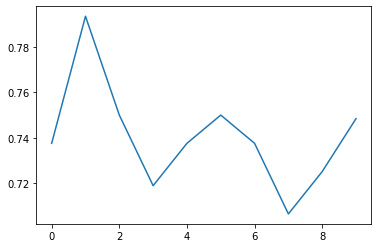

In [13]:

print('k = 1: ')
plt.plot(modelNeighborsCV_k1)






k = 3: 


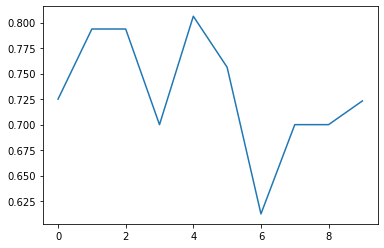

In [14]:
print('k = 3: ')
plt.plot(modelNeighborsCV_k3)

k = 5: 


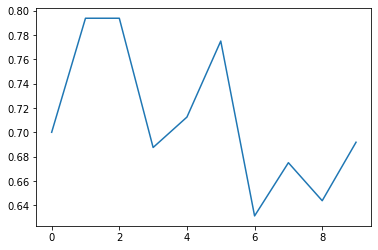

In [15]:
print('k = 5: ')
plt.plot(modelNeighborsCV_k5)

k = 5 weghted by distance: 


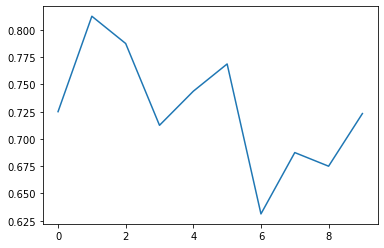

In [16]:
print('k = 5 weghted by distance: ')
plt.plot(modelNeighborsCV_k5d)

k = 1: 


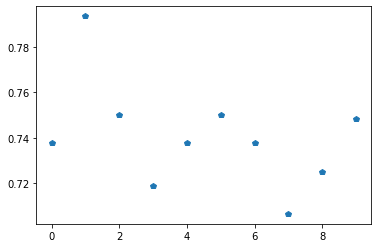

In [17]:
print('k = 1: ')
plt.plot(modelNeighborsCV_k1, "p")

k = 3: 


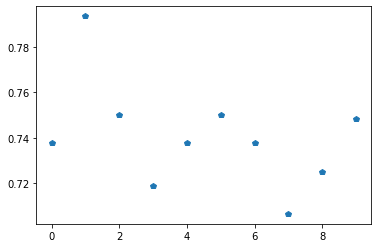

In [18]:
print('k = 3: ')
plt.plot(modelNeighborsCV_k1, "p")

k = 5: 


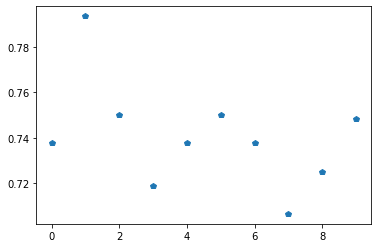

In [19]:
print('k = 5: ')
plt.plot(modelNeighborsCV_k1, "p")

k = 5 weghted by distance: 


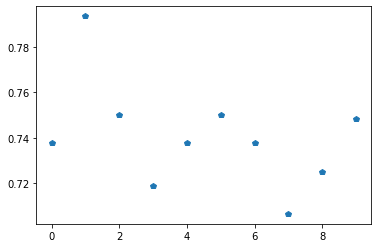

In [20]:
print('k = 5 weghted by distance: ')
plt.plot(modelNeighborsCV_k1, "p")

In [21]:

print('k = 1: ')
print(modelNeighborsCV_k1.mean())

print('k = 3: ')
print(modelNeighborsCV_k3.mean())

print('k = 5: ')
print(modelNeighborsCV_k5.mean())

print('k = 5 weghted by distance: ')
print(modelNeighborsCV_k5d.mean())

k = 1: 
0.7404677672955975
k = 3: 
0.7310770440251572
k = 5: 
0.7104323899371069
k = 5 weghted by distance: 
0.7267020440251573


#### แสดงค่าเฉลี่ย model accuracy ของแต่ละ fold

In [23]:
from sklearn.neighbors import NearestNeighbors
modelNeighbors_k1 = neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
modelNeighbors_k1.fit(X_train,y_train)






y_pred = modelNeighbors_k1.predict(X_test)

print("k = 1 Predicted values:") 
print(y_pred)

print("k = 1 Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


k = 1 Predicted values:
['0' '0' '1' '1' '1' '1' '1' '0' '1' '0' '1' '0' '1' '1' '1' '0' '1' '0'
 '0' '0' '1' '1' '0' '1' '0' '1' '0' '0' '1' '1' '1' '1' '1' '1' '0' '0'
 '0' '1' '1' '0' '1' '0' '0' '1' '0' '1' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '1' '1' '1' '1' '1' '0' '1'
 '1' '1' '0' '1' '1' '1' '0' '1' '1' '0' '0' '1' '1' '0' '0' '1' '0' '1'
 '0' '1' '1' '1' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '1'
 '0' '1' '1' '0' '0' '1' '0' '1' '0' '0' '0' '1' '0' '1' '1' '0' '0' '0'
 '0' '0' '1' '1' '1' '0' '1' '0' '1' '1' '0' '1' '1' '1' '0' '1' '1' '0'
 '0' '0' '1' '0' '1' '1' '1' '0' '0' '1' '0' '1' '1' '1' '0' '1']
k = 1 Accuracy: 82.5


### การหาระยะทาง distance
#### The Minkowski distance of order ''p'' between two points

: $$X=(x_1,x_2,\ldots,x_n)\text{ and }Y=(y_1,y_2,\ldots,y_n) \in \mathbb{R}^n$$

#### is defined as:

:$$D\left(X,Y\right)=\left(\sum_{i=1}^n |x_i-y_i|^p\right)^\frac{1}{p}$$

#### ต้องการหาความแตกต่างระหว่าง instance $x_i$ และ $x_j$ และคำนวณระยะทางระหว่าง instance $D\left(X,Y\right)$


In [24]:
from sklearn.neighbors import NearestNeighbors
modelNeighbors_k3 = neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
modelNeighbors_k3.fit(X_train,y_train)






y_pred = modelNeighbors_k3.predict(X_test)

print("k = 3 Predicted values:") 
print(y_pred)

print("k = 3 Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

k = 3 Predicted values:
['0' '0' '1' '1' '1' '1' '1' '0' '1' '0' '1' '0' '0' '1' '1' '0' '1' '0'
 '0' '0' '1' '1' '0' '1' '0' '1' '1' '0' '1' '1' '1' '1' '1' '1' '0' '0'
 '0' '1' '1' '0' '1' '0' '1' '1' '0' '0' '1' '0' '0' '1' '0' '0' '1' '0'
 '0' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '0' '1'
 '0' '1' '0' '0' '1' '1' '0' '1' '1' '0' '0' '1' '0' '0' '0' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0'
 '0' '0' '1' '0' '0' '1' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0'
 '0' '0' '1' '1' '0' '0' '1' '0' '1' '1' '0' '1' '1' '1' '0' '1' '1' '0'
 '1' '0' '1' '0' '0' '1' '1' '0' '0' '1' '0' '1' '1' '1' '0' '1']
k = 3 Accuracy: 80.0


In [25]:
from sklearn.neighbors import NearestNeighbors
modelNeighbors_k5 = neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
modelNeighbors_k5.fit(X_train,y_train)






y_pred = modelNeighbors_k5.predict(X_test)

print("k = 5 Predicted values:") 
print(y_pred)

print("k = 5 Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

k = 5 Predicted values:
['0' '0' '1' '0' '1' '1' '1' '0' '0' '1' '1' '0' '0' '0' '1' '1' '1' '0'
 '0' '0' '1' '0' '0' '1' '0' '1' '1' '0' '1' '1' '1' '1' '0' '1' '0' '0'
 '0' '1' '1' '0' '1' '0' '1' '1' '0' '0' '1' '0' '0' '1' '0' '0' '1' '0'
 '0' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '1' '0' '1'
 '0' '1' '0' '0' '1' '1' '0' '1' '1' '0' '0' '1' '0' '0' '0' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '1' '1' '1'
 '1' '0' '1' '0' '1' '1' '0' '1' '0' '0' '0' '1' '0' '1' '1' '0' '0' '0'
 '0' '0' '1' '1' '0' '0' '1' '0' '1' '1' '0' '1' '1' '1' '0' '1' '1' '1'
 '1' '0' '0' '0' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1']
k = 5 Accuracy: 76.25


In [26]:
from sklearn.neighbors import NearestNeighbors
modelNeighbors_k5d = neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')
modelNeighbors_k5d.fit(X_train,y_train)






y_pred = modelNeighbors_k5d.predict(X_test)

print("k = 5 weighted by distance Predicted values:") 
print(y_pred)

print("k = 5 weighted by distance Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

k = 5 weighted by distance Predicted values:
['0' '0' '1' '1' '1' '1' '1' '0' '0' '1' '1' '0' '0' '1' '1' '1' '1' '0'
 '0' '0' '1' '0' '0' '1' '0' '1' '1' '0' '1' '1' '1' '1' '0' '1' '0' '0'
 '0' '1' '1' '0' '1' '0' '1' '1' '0' '1' '1' '0' '0' '1' '0' '0' '1' '0'
 '0' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '0' '1'
 '1' '1' '0' '0' '1' '1' '0' '1' '1' '0' '0' '1' '0' '0' '0' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1'
 '0' '1' '1' '0' '1' '1' '0' '1' '0' '0' '0' '1' '0' '1' '1' '0' '0' '0'
 '0' '0' '1' '1' '1' '0' '1' '0' '1' '1' '0' '1' '1' '1' '0' '1' '1' '1'
 '1' '0' '0' '0' '1' '1' '1' '0' '0' '1' '1' '1' '1' '1' '1' '1']
k = 5 weighted by distance Accuracy: 83.75


### วิเคราะห์และสรุปผลการทดลอง
 #### 1.กำหนดขนาดของ k = 1 ค่า accuracy = 82.5 % 
 - k = 3 ค่า accuracy = 80 % 
 - k = 5 ค่า accuracy = 76.25 %
 - k = 5 โดยกำหนดค่า weight ตามระยะห่าง ค่า accuracy = 83.75 %
 #### จะพบว่าการกำหนดค่า k ที่ 5 และกำหนด weight ตามระยะห่าง มีประสิทธิภาพสุด
 #### 2.คำนวณระยะห่าง distance ของข้อมูลที่ต้องการพิจารณากับกลุ่มข้อมูลตัวอย่างแบ่งเป็น uniform และ distance
 #### การกำหนดระยะห่างเป็น distance มีความเหมาะสมกับชุดข้อมูล

 #### 3.จัดเรียงลำดับของระยะห่าง และเลือกพิจารณาชุดข้อมูลที่ใกล้จุดที่ต้องการพิจารณาตามจำนวน k ที่กำหนดไว้จะใช้ให้มีความแม่นยำในการจำแนกมากชึ้น

 #### 4.หากพิจารณาข้อมูลจำนวน k ชุด และสังเกตว่า class ไหนที่ใกล้จุดที่พิจารณาเป็นจำนวนมากที่สุดจะถูกจำแนก

 #### 5.ต้องกำหนด class ให้กับจุดที่พิจารณา

 k-Nearest Neighbors ทำให้เราทราบประเภทข้อมูลของสิ่งของที่เรายังไม่เคยจำแนกมาก่อนได้ ในการใช้งานจริงยังมีเงื่อนไขบางอย่างที่เราต้องพิจารณาเป็นพิเศษ

